University of Helsinki, Master's Programme in Data Science  
DATA20047 Probabilistic Cognitive Modelling - Spring 2025  
Luigi Acerbi  

# Problem Set 2: Response distribution and model fitting

- This homework problem set focuses on **Week 3 and 4** of the course.
- This problem set is worth **25 points** in total (out of 100 for the full course).
- Check the submission deadline on Moodle!


## Submission instructions

Submission must be perfomed entirely on Moodle (**not** by email).
1. When you have completed the exercises, save the notebook.
2. Report your solutions and answers on Moodle ("*Problem set 2 answer return*").
3. Submit two files on Moodle ("*Problem set 2 notebook return*"): 
  - The notebook as `.ipynb`.
  - The same notebook downloaded as `.pdf`.

#### How to save the notebook as PDF

There are various ways to save the Jupyter notebook as PDF, depending on the version of Jupyter notebook you have.

- In older versions, you should be able to select "File" > "Print Preview" and then print the page to PDF using your browser (remember to enter the Print Preview first).
- In more recent versions, you can select "File" > "Save and Export Notebook As" > "PDF".
  * For this to work, you may need to install [Pandoc](https://pandoc.org/installing.html) first.
  * Compiling to PDF might take a while.

## IMPORTANT

1. Do not share your code and answers with others. Contrary to the class exercises, which you can do with others, these problems are *not* group work and must be done individually.
2. It is allowed to use snippets of code from the lecture exercises and model solutions.
3. It is your responsibility to ensure that the notebook has fully finished running all the cells, all the plots view properly etc. before submitting it. However, the notebook should be runnable from scratch if needed ("Kernel > Restart & Run All").
4. Submit your work by the deadline.
5. Unless stated otherwise, please report your numerical answers in Moodle with full numerical precision (~14-15 digits), unless the answer is an integer.
6. If you are confused, think there is a mistake or find things too difficult, please ask on Moodle.

## References

- \[**MKG23**\] Ma WJ, Körding K, and Goldreich D. "Bayesian Models of Perception and Action: An Introduction". MIT Press, 2023.
- \[**AWV12**\] Acerbi L, Wolpert DM, Vijayakumar S. "Internal Representations of Temporal Statistics and Feedback Calibrate Motor-Sensory Interval Timing". *PLoS Computational Biology*, 2012. [Link](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1002771)

In [1]:
# set-up -- do not change
import numpy as np
import numpy.random as npr
import scipy as sp
import scipy.stats as sps
import pandas as pd
import matplotlib.pyplot as plt
npr.seed(1)

# Question 2.1 (7 pts)

#### Bayesian observer performance with different priors

> This question explores how a Bayesian observer's performance depends on their prior beliefs about the stimulus distribution. We'll compare the Root Mean Squared Error (RMSE) for observers with different priors, demonstrating a key principle in Bayesian observer modelling: performance is optimal (lowest RMSE) when the observer's prior matches the true stimulus distribution. This problem draws on concepts from Week 3, including Bayesian estimation and RMSE calculations. See Chapter 4.5 of \[**MKG23**\] and the lecture notes for Week 3.

Consider a Bayesian observer estimating a stimulus with true distribution $p(s) = \text{Uniform}(s; -5, 5)$. The measurement process is noisy, described by a Gaussian distribution (and likelihood) $p(x|s) = \mathcal{N}\left(x; s, \sigma^2 \right)$ with $\sigma = 2$.

The observer:
- Uses the posterior mean estimator $\hat{s}_{PM}$.
- Has no response noise.
- May use a prior $q(s)$ that differs from the true stimulus distribution $p(s)$, i.e., a *mismatched* prior.

#### Tasks

Calculate the total RMSE for three different cases:

- a) The observer uses the correct prior: $q(s) = p(s) = \text{Uniform}(s; -5, 5)$.
- b) The observer uses a Gaussian approximation of the true distribution: $q(s) = \mathcal{N}\left(s; \mu_s, \sigma_s^2 \right)$, where $\mu_s$ and $\sigma_s^2$ match the mean and variance of $p(s)$.
   - *Note*: For a continuous uniform distribution on the $[a,b]$ interval, the variance is $(b-a)^2/12$.
- c) The observer uses a wider uniform prior: $q(s) = \text{Uniform}\left(s; -8, 8 \right)$.

Report your results in Moodle. The accepted tolerance is $\pm 0.001$ from the true value.

#### Key equations

Recall that the (total) RMSE of an estimator $\hat{s}$ is defined as
$$
\text{RMSE}[\hat{s}] = \sqrt{\int \text{MSE}\left[\hat{s}|s\right] p(s) ds}
$$
where $p(s)$ is the true empirical distribution and $\text{MSE}\left[\hat{s}|s\right]$ is the mean squared error at each stimulus, defined as:
$$
\text{MSE}\left[\hat{s}|s\right] = \mathbb{E}_{\hat{s}|s}\left[\left(\hat{s}-s\right)^2|s \right] = \text{Bias}\left[\hat{s}|s\right]^2 + \text{Var}\left[\hat{s}|s\right],
$$
where the definitions for bias and variance can be found in the textbook or lecture notes.


#### Hints
- You may be able to solve some of these problems analytically, but others will require numerical integration (e.g., `scipy.integrate.romb` or others).
- Note that changing the prior $q(s)$ will change $\hat{s}(x)$, but nothing else! So once you manage to compute (a), you should be able to compute (b) and (c) with a small change to the code, only where $\hat{s}(x)$ is computed.
- You may want to check out Exercise 3.3 of the lecture notebooks.

In [22]:
def compute_posterior_mean_1d(s_grid, prior_pdf, likelihood):
    """Compute s_hat_PM (posterior mean) for an arbitrary prior and likelihood in 1d."""
    ds = s_grid.flatten()[1] - s_grid.flatten()[0] # grid spacing
    protoposterior = prior_pdf * likelihood    
    normalization_constant = sp.integrate.romb(protoposterior, dx=ds, axis=0)
    posterior_pdf = protoposterior / normalization_constant
    posterior_mean = sp.integrate.romb(s_grid * posterior_pdf, dx=ds, axis=0)
    return posterior_mean

In [23]:
a, b = -5., 5.
sigma = 2.

Nx = Ns = 2**11+1

In [24]:
print('a)')

upper_bound = b + sigma * 8
lower_bound = a - sigma * 8
x_row = np.linspace(lower_bound, upper_bound, Nx).reshape((1,Nx))
s_col = np.linspace(lower_bound, upper_bound, Ns).reshape((Ns,1))
dx = x_row.flatten()[1] - x_row.flatten()[0]
ds = s_col.flatten()[1] - s_col.flatten()[0]

likelihood_pdf = sps.norm.pdf(x_row, s_col, sigma)
prior_pdf = sps.uniform.pdf(s_col, a, b - a)

s_hat = compute_posterior_mean_1d(s_col, prior_pdf, likelihood_pdf)

bias = sp.integrate.romb(s_hat * likelihood_pdf, dx=dx, axis=1) - s_col.flatten()
var = sp.integrate.romb(s_hat**2 * likelihood_pdf, dx=dx, axis = 1) - sp.integrate.romb(s_hat*likelihood_pdf, dx=dx, axis=1)**2

mse = (bias**2+var)

print(f"total rmse: {np.sqrt(sp.integrate.romb(mse*prior_pdf.flatten(), dx = ds, axis = 0))}")

a)
total rmse: 1.5980857171741227


In [25]:
print('b)')

mu_s = .5 * (a+b)
sigma_s = np.sqrt(1/12 * (b-a)**2)

lower_bound = mu_s - sigma * 8
upper_bound = mu_s + sigma * 8

x_row = np.linspace(lower_bound, upper_bound, Nx).reshape((1,Nx))
s_col = np.linspace(lower_bound, upper_bound, Ns).reshape((Ns,1))
dx = x_row.flatten()[1] - x_row.flatten()[0]
ds = s_col.flatten()[1] - s_col.flatten()[0]

prior_pdf = sps.norm.pdf(s_col, mu_s, sigma_s)
likelihood_pdf = sps.norm.pdf(x_row, s_col, sigma)

s_hat = compute_posterior_mean_1d(s_col, prior_pdf, likelihood_pdf)


bias = sp.integrate.romb(s_hat * likelihood_pdf, dx=dx, axis=1) - s_col.flatten()
var = sp.integrate.romb(s_hat**2 * likelihood_pdf, dx=dx, axis = 1) - sp.integrate.romb(s_hat*likelihood_pdf, dx=dx, axis=1)**2

mse = (bias**2+var)

print(f"total rmse: {np.sqrt(sp.integrate.romb(mse*prior_pdf.flatten(), dx = ds, axis = 0))}")


b)
total rmse: 1.644190739550082


In [26]:
print('c)')

true_a, true_b = -5., 5.
a, b = -8., 8.  

lower_bound = a - sigma * 8
upper_bound = b + sigma * 8

true_lower_bound = true_a - sigma * 8
true_upper_bound = true_b + sigma * 8
true_s_col = np.linspace(true_lower_bound, true_upper_bound, Ns).reshape((Ns,1))

x_row = np.linspace(lower_bound, upper_bound, Nx).reshape((1,Nx))
s_col = np.linspace(lower_bound, upper_bound, Ns).reshape((Ns,1))
dx = x_row.flatten()[1] - x_row.flatten()[0]
ds = s_col.flatten()[1] - s_col.flatten()[0]

likelihood_pdf = sps.norm.pdf(x_row, s_col, sigma)
mismatched_prior_pdf = sps.uniform.pdf(s_col, a, b - a)
true_prior_pdf = sps.uniform.pdf(true_s_col, true_a, true_b - true_a)
s_hat = compute_posterior_mean_1d(s_col, mismatched_prior_pdf, likelihood_pdf)

bias = sp.integrate.romb(s_hat * likelihood_pdf, dx=dx, axis=1) - s_col.flatten()
var = sp.integrate.romb(s_hat**2 * likelihood_pdf, dx=dx, axis=1) - sp.integrate.romb(s_hat * likelihood_pdf, dx=dx, axis=1)**2

mse = (bias**2 + var)

total_rmse = np.sqrt(sp.integrate.romb(mse * true_prior_pdf.flatten(), dx=ds, axis=0))

print(f"total rmse: {total_rmse}")

c)
total rmse: 1.9159070867805754


# Question 2.2 (6 pts)

#### Response distributions in time perception

> This question explores how different experimental conditions affect the distribution of responses in a time perception task. We'll analyze how an observer's responses vary when exposed to different ranges of time intervals, incorporating both perceptual and motor noise according to Weber's law. Our analysis follows \[**JS10**\] under different assumptions about the Bayesian observer. This problem builds on concepts from Week 3, including MAP estimation and response distributions.

Consider the time perception experiment from \[**JS10**\] which we analyzed in Exercise 3.5.
We recall the setup below. Note that there are differences from Exercise 3.5 (marked as **NEW**):
- In this experiment, an observer is asked to judge the time interval $s$ between two flashes, measured in milliseconds (ms). In each trial, the duration is drawn from an interval distribution $p(s)$. 
- The experiment consist of three separate blocks of sessions run over multiple days. Each experimental block is identical except for the distribution of intervals $p(s)$. The distribution of time intervals in the three blocks are: 
  - $p_\text{short}(s) = \text{Uniform}\left(s; 494, 847\right)$
  - $p_\text{medium}(s) = \text{Uniform}\left(s; 671, 1023\right)$
  - $p_\text{long}(s) = \text{Uniform}\left(s; 847,1200\right)$
- The observer's measurement distribution follows *Weber's law* (known in time perception as the "scalar property" of temporal judgment). According to this empirical law, the measurement noise is roughly linearly proportional to the magnitude of the stimulus. In formulas, $$p(x|s) = \mathcal{N}\left(x|s,\sigma^2(s)\right) \qquad \text{with} \quad \sigma(s) = w_s \cdot s$$
  where $w_s$ is known as *Weber's fraction*. Typical values of $w_s$ in timing are around 0.05-0.2, here we assume $w_s = 0.1$.
- It is assumed that, after some practice, the observer develops a prior $p(s)$ which matches the stimulus distribution used in that block of sessions (and that the likelihood also matches the measurement distribution).
- **NEW**: The observer responds with a deterministic estimate $\hat{s}_\text{MAP}$ which we assume is the mode of the posterior (also known as *maximum-a-posteriori* or MAP estimate). 
- **NEW**: The response is corrupted by motor noise which is proportional to the estimate:
$$p(r|\hat{s}) = \mathcal{N}\left(r; \hat{s}, \sigma_\text{m}^2(\hat{s})\right) \qquad \text{with} \quad \sigma_\text{m}(\hat{s}) = w_\text{m} \cdot \hat{s}$$ 
  where $w_\text{m}$ represents the Weber's fraction for the motor noise. Here we assume $w_\text{m} = 0.05$.
  
#### Tasks

In this exercise, we look at the *distribution of responses* $p(r|s)$ that the experimenter would observe for a given stimulus in the three different experimental blocks (short, medium, or long). We consider the stimulus $s^\star = 847$ ms which appears in all three experimental blocks.

- a) Compute $p(r|s = s^\star)$ for the "short" block. Compute the mean and standard deviation of $p(r|s = s^\star)$ and report them on Moodle.
- b) Compute $p(r|s = s^\star)$ for the "medium" block. Compute the mean and standard deviation of $p(r|s = s^\star)$ and report them on Moodle.
- c) Compute $p(r|s = s^\star)$ for the "long" block. Compute the mean and standard deviation of $p(r|s = s^\star)$ and report them on Moodle.

The accepted tolerance for the solutions is $\pm 0.2$ ms for (a) and (b), and $\pm 0.5$ ms for (c).

#### Key equations
Recall that the response distribution is given by:
$$
p(r|s) = \int p(r|\hat{s}(x)) p(x|s) dx,
$$
which in the general case can be solved via numerical integration.

#### Hints 
- Be careful that the likelihood, $p(x|s)$ as a function of $s$, is *not* Gaussian, because $\sigma(s)$ is not constant in $s$. As a consequence, the posterior will *not* be Gaussian. This affects the MAP estimate, $\hat{s}_\text{MAP}$, which you will need to compute numerically. As an example of this phenomenon of stimulus-dependent variance yielding a non-Gaussian likelihood, see Demo 3.4 in the lecture notebooks.
- It is recommended that you first compute $\hat{s}_\text{MAP}(x)$ for a grid of $x$, and then compute the response distribution numerically via the integral above.
- The MAP estimate $\hat{s}_\text{MAP}$ is the value of $s$ that maximizes the posterior $p(s|x)$. Note that this value does not depend on the normalization constant, so you can compute $p(s|x) \propto p(s) p(x|s)$ for a (fine) grid of values `s_grid` and take the argument $s$ that maximizes this quantity.
- Common mistake: $s^\star = 847$ ms is the true stimulus chosen by the experimenter, the observer only receives noisy measurements $x$, not $s^\star$!
- Suggested pipeline: First compute $\hat{s}_\text{MAP}(x)$ for each value in a grid (`x_grid`); then compute the response distribution via numerical integration over that grid; finally compute summary statistics via numerical integration.

#### Sanity checks
- As an intermediate sanity check that you are computing the posterior and the estimate correctly, you can check that $\hat{s}_\text{MAP}(x = 759) \approx 751.50$ for case (a), i.e. the "short" prior block.
- Throughout your pipeline, double-check the sizes of the arrays you are using.
- At the end, check that $\int p(r|s) dr = 1$.

In [27]:
a_short, b_short = 494., 847.
a_medium, b_medium = 671., 1023.
a_long, b_long = 847., 1200.

s_star = 847
w_s = 0.1
w_m = 0.05

lower_bound = 400 
upper_bound = 1300

Nx = Ns = 2**10+1

s_grid = np.linspace(lower_bound, upper_bound, Ns)
x_grid = np.linspace(lower_bound, upper_bound, Nx)
ds = s_grid.flatten()[1] - s_grid.flatten()[0]
dx = x_grid.flatten()[1] - x_grid.flatten()[0]

priors = {
    "short": sps.uniform.pdf(s_grid, a_short, b_short - a_short)
    ,"medium": sps.uniform.pdf(s_grid, a_medium, b_medium - a_medium)
    ,"long": sps.uniform.pdf(s_grid, a_long, b_long - a_long)
}

for block, prior_s in priors.items():
    likelihood_pdf = sps.norm.pdf(x_grid, s_grid.reshape(-1, 1), w_s * s_grid.reshape(-1, 1))
    posterior_pdf = prior_s.reshape(-1, 1) * likelihood_pdf
    s_hat = s_grid[np.argmax(posterior_pdf, axis=0)]
    
    response_pdf = np.sum(
        sps.norm.pdf(x_grid.reshape(1, -1), s_star, w_s * s_star) * sps.norm.pdf(x_grid.reshape(-1, 1), s_hat, w_m * s_hat)
        ,axis = 1
    )
    response_pdf /= sp.integrate.romb(response_pdf, dx = dx)
    mu_resp = sp.integrate.romb(x_grid * response_pdf, dx = dx)
    sigma_resp = np.sqrt( sp.integrate.romb((x_grid - mu_resp)**2 * response_pdf, dx = dx) )
    print(f"{block} block: mu = {mu_resp}, sigma = {sigma_resp}")


short block: mu = 809.00991118739, sigma = 65.63311779369755
medium block: mu = 838.996632384212, sigma = 91.3745203363932
long block: mu = 876.6418316088121, sigma = 63.579335559718054


# Question 2.3 (6 pts)

#### Model Fitting with Lapses in Time Perception

> The key quantity for model fitting is the log-likelihood for a dataset and some model parameters. In this exercise, we compute the log-likelihood for a Bayesian observer model which also includes the possibility of *lapses*, a common mechanism used in cognitive science to explain away "random" responses and subjects' mistakes. This problem builds on concepts from Week 4, particularly model fitting and likelihood computation.

In this question, we consider the datasets from Experiment 3 of \[**AWV12**\], as seen in Week 4. The experimental setup which involves time perception and interval reproduction is very similar to \[**JS10**\], so we can consider the same type of models.

We analyze the data with the `gaussianobserverwithlapse` model, defined as follows:
- We assume the observer builds a (mismatched) Gaussian prior $p(s) = \mathcal{N}\left(s| \mu_\text{prior}, \sigma_\text{prior}^2 \right)$ over the stimuli (time intervals). 
- We assume that the measurement distribution and likelihood are also Gaussian, $p(x|s) = \mathcal{N}\left(x| s, \sigma^2 \right)$.
- The observer uses the *posterior mean* estimator for the value of the stimulus, $\hat{s}_\text{PM}$.
- Gaussian motor response noise is added to the estimate, $p(r|\hat{s}) = \mathcal{N}\left(r| \hat{s}, \sigma_\text{motor}^2 \right)$.
- In each trial, the observer lapses with probability $\lambda$ (the *lapse rate*), in which case the response is drawn from $p_\text{lapse}(r) = \text{Uniform}\left(r; 0, 1500 \right)$ ms. Otherwise, the observer responds normally (according to $p(r|\hat{s})$ described above) with probability $1 - \lambda$. 
- The parameters of this model are $\mathbf{\theta} = \left(\mu_\text{prior}, \sigma_\text{prior}, \sigma, \sigma_\text{motor}, \lambda \right)$.

#### Tasks

For parameter values $\mathbf{\theta}_\star = \left(\mu_\text{prior} = 780, \sigma_\text{prior} = 140, \sigma = 90, \sigma_\text{motor} = 60, \lambda = 0.02 \right)$:

- a) Compute the log-likelihood of model parameter $\theta_\star$ for the dataset of subject 2
- b) Compute the log-likelihood of model parameter $\theta_\star$ for the dataset of subject 5

Report your results on Moodle with high precision.

#### Key equations
Recall that for each trial $i$, the probability of observing response $r_i$ given stimulus $s_i$ is:
$$p(r_i|s_i, \theta) = (1-\lambda) \cdot p_\text{normal}(r_i|s_i) + \lambda \cdot p_\text{lapse}(r_i).$$

The log-likelihood is the sum of log probabilities across all trials:
$$\log \mathcal{L}(\theta) = \sum_{i=1}^N \log p(r_i|s_i, \theta).$$

#### Hints
- If you use code from the lectures, be careful about the model definition, as there may be subtle differences.
- Remember to properly handle the response distribution with lapses (normal responses + lapses).
- The response noise distribution $p(r|s_i)$ for normal (non-lapse) responses is obtained by marginalizing over the measurement $x$, as we saw earlier:
  $p_\text{normal}(r|s_i) = \int p(r|\hat{s}(x)) p(x|s_i) dx$.

In [28]:
# Load data of Experiment 3 of [AWV12] from .csv file to a Pandas dataframe
df = pd.read_csv('https://raw.githubusercontent.com/lacerbi/prob-cog-mod-files/main/data/awv12_exp3.csv')

# Remove unused columns (they deal with performance feedback, which we ignore in this lecture)
df.drop(df.columns[[6, 7, 8]], axis=1, inplace=True)

# Remove rows with NaNs
df.dropna(axis=0, inplace=True)

df.head()

,Subject id,Session id,Run id,Stimulus (ms),Response (ms),Stimulus id
0,1,1,1,973.327049,862.947945,6.0
1,1,1,1,677.519900,574.920276,2.0
2,1,1,1,826.253049,870.995615,4.0
3,1,1,1,677.854859,695.055098,2.0
4,1,1,1,598.501198,632.981845,1.0


s.shape: (2520,)
r.shape: (2520,)


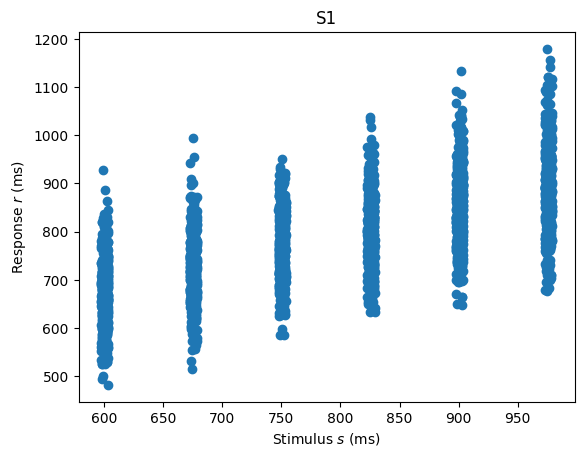

In [29]:
# Example code to extract stimuli and responses for a single subject (here S1)
subject = 1
s = np.array(df['Stimulus (ms)'][df['Subject id'] == subject])
r = np.array(df['Response (ms)'][df['Subject id'] == subject])
print('s.shape:', s.shape)
print('r.shape:', r.shape)

plt.scatter(s, r)
plt.xlabel('Stimulus $s$ (ms)')
plt.ylabel('Response $r$ (ms)')
plt.title('S' + str(subject))
plt.show()

In [30]:
def gaussian_response(s,theta):
    """Compute mean and standard deviation of p(r|s; theta)."""
    # Unpack parameter vector theta
    mu_prior = theta[0]
    sigma_prior = theta[1]
    sigma = theta[2]
    sigma_motor = theta[3]
    # Compute mean and std of the response
    w = sigma_prior**2/(sigma_prior**2 + sigma**2)    
    mu_resp = w*s + (1-w)*mu_prior
    sigma_resp = np.sqrt(w**2*sigma**2 + sigma_motor**2)
    return mu_resp, sigma_resp

In [31]:
def loglike(theta, stimuli, responses):
    
    mu_s, sigma_s, sigma, sigma_motor, lapse_rate = theta
    mu_resp, sigma_resp = gaussian_response(stimuli, np.array( (mu_s, sigma_s, sigma, sigma_motor) ))
    loglike_vec = sps.norm.logpdf(responses, mu_resp, sigma_resp)
    
    if lapse_rate > 0.:
        likelihood_vec = np.exp(loglike_vec) # Exponentiate back to the likelihood
        likelihood_with_lapse_vec = (1 - lapse_rate) * likelihood_vec + lapse_rate * sps.uniform.pdf(r, 0, 1500)
        loglike_vec = np.log(likelihood_with_lapse_vec)
    return np.sum(loglike_vec)


theta_star = (780, 140, 90, 60, 0.02)
subject_list = list( (2, 5) )

for subj in subject_list:
	s = np.array(df[ 'Stimulus (ms)' ][df['Subject id'] == subj])
	r = np.array(df['Response (ms)'][df['Subject id'] == subj])
	print('s.shape:', s.shape)
	print('r.shape:', r.shape)
	print(f"log likelihood for subject {subj}: {loglike(theta_star, s, r)}")


s.shape: (1512,)
r.shape: (1512,)
log likelihood for subject 2: -8577.318546123512
s.shape: (1520,)
r.shape: (1520,)
log likelihood for subject 5: -9105.655523964238


# Question 2.4 (6 pts)

#### Population-level Model Fitting Analysis

> When fitting models to data, the experimenter may be interested in how model parameters are represented across the population (here represented by the group of subjects). A simple way to look at this is to examine the distribution of maximum-likelihood estimates for the parameters across subjects, in first instance by looking their mean and variability. This question builds on the model fitting concepts from Week 4, focusing on population-level analysis.

We consider here the `idealgaussianobserverwithlapse` model. This model is the same as the `gaussianobserverwithlapse` of Question 2.3, but with fixed prior parameters:
- Fixed prior mean: $\mu_\text{prior} = 787.5$ ms.
- Fixed prior standard deviation: $\sigma_\text{prior} = 128.1$ ms.
- Thus, the model has three free parameters: $\theta = \left(\sigma, \sigma_\text{motor}, \lambda \right)$.

#### Tasks

a) Perform individual subject fits:
   - Fit the `idealgaussianobserverwithlapse` model separately to each of the six subjects' datasets using maximum-likelihood estimation.
   - Compute the mean and standard deviation of each parameter ($\sigma, \sigma_\text{motor}, \lambda$) across subjects and report these in Moodle.
   - Use the correction for degrees of freedom for standard deviation (`np.std(..., ddof=1)`).

b) Perform pooled data analysis:
   - Combine all subjects' data into a single dataset.
   - Fit the model to this pooled dataset.
   - Report the maximum-likelihood estimates for $\sigma, \sigma_\text{motor}, \lambda$ in Moodle.

#### Key equations
The log-likelihood for a dataset $\mathcal{D}$ is:
$$\log \mathcal{L}(\theta; \mathcal{D}) = \sum_i \log p(r_i|s_i, \theta),$$
where $p(r_i|s_i, \theta)$ is defined as in Question 2.3.

#### Hints
- If you use code from the lectures for the `idealgaussianobserverwithlapse` model, be careful about the model definition.
- Make sure your optimization routine finds the global maximum.
- Watch for numerical stability issues in the optimization.
- Remember that parameters have natural constraints ($\sigma, \sigma_\text{motor} > 0$ and $0 \leq \lambda \leq 1$).

#### Sanity checks
- Verify that the log-likelihood for subject 1 with $\theta_\star = \left(\sigma = 90, \sigma_\text{motor} = 80, \lambda = 0.02\right)$ is $\log \mathcal{L}(\theta_\star; \mathcal{D}_1) \approx -14709.795$.
- All fitted parameters should be within reasonable ranges (e.g., $\sigma, \sigma_\text{motor}$ should be positive but not huge).
- The lapse rate $\lambda$ should be small (typically < 0.1).

#### Important note
As we mentioned in class, fitting individual subjects' data is the best approach to describe individual behavior in cognitive science, but sometimes you will see studies only looking at pooled/group data. Be careful that pooling might hide what really happens, only giving a snapshot of the average behavior of the group, which might not correspond to what individuals do.

In [32]:
try: 
    from pybads.bads import BADS
    method = 'BADS'
except:
    method = 'L-BFGS-B'

In [33]:
def idealgaussianobserverwithlapse_loglike(theta,s_vec,r_vec):
    """Log-likelihood of ideal Gaussian observer with added lapse."""
    mu_prior = 787.5
    sigma_prior = 128.1
    sigma, sigma_motor, lapse_rate = theta
    lapse_pdf = sps.uniform.pdf(r_vec, 0, 1500)
    mu_resp, sigma_resp = gaussian_response(s_vec,np.array((mu_prior,sigma_prior,sigma,sigma_motor)))
    # First, compute log-likelihood without probability of lapse
    loglike_vec = sps.norm.logpdf(r_vec,mu_resp,sigma_resp) # Vector of log-likelihood per trials
    # Now, add the probability of lapse
    if lapse_rate > 0.:
        likelihood_vec = np.exp(loglike_vec) # Exponentiate back to the likelihood
        likelihood_with_lapse_vec = (1-lapse_rate)*likelihood_vec + lapse_rate*lapse_pdf
        loglike_vec = np.log(likelihood_with_lapse_vec)
        # This code snippet below uses the logsumexp trick, which is numerically more stable
        # loglapse = np.log(lapse_rate*lapse_pdf)
        # M = np.maximum(loglike, loglapse)
        # loglike = np.log((1-lapse_rate)*np.exp(loglike-M) + np.exp(loglapse-M)) + M        
    return np.sum(loglike_vec)

In [34]:
np.set_printoptions(suppress=True)

In [35]:
print("a)")
lower_bounds = np.array([1.,1.,0.])
upper_bounds = np.array([2000.,2000.,1.])

num_runs = 3


def multioptimize(target_fun,lower_bounds,upper_bounds,plausible_lower_bounds,plausible_upper_bounds,num_runs=3,method='L-BFGS-B'):
    """Simple function for multi-start optimization."""
    # Run num_runs optimization runs from different starting points    
    num_params = lower_bounds.shape[0]
    theta_res = np.zeros((num_runs,num_params))
    nll_res = np.zeros(num_runs)    
    
    for index in range(num_runs):
        if index == 0:
            theta0 = 0.5*(plausible_lower_bounds + plausible_upper_bounds)
        else:
            theta0 = np.random.uniform(low=plausible_lower_bounds,high=plausible_upper_bounds)
        
        if method == 'L-BFGS-B':
            bounds = sp.optimize.Bounds(lower_bounds,upper_bounds,True) # Set hard bounds
            res = sp.optimize.minimize(target_fun, theta0, method='L-BFGS-B', bounds=bounds)
            nll_res[index] = res.fun
            theta_res[index] = res.x
        elif method == 'BADS':
            bads = BADS(target_fun, theta0, lower_bounds, upper_bounds, plausible_lower_bounds, plausible_upper_bounds)
            res = bads.optimize()
            nll_res[index] = res.fval
            theta_res[index] = res.x
        else:
            error('Unknown optimization method.')
        print('Run {}: log-likelihood {}'.format(index, -nll_res[index]))
        
    # Pick the best solution
    idx_best = np.argmin(nll_res)
    nll_best = nll_res[idx_best]
    theta_best = theta_res[idx_best]        
    return nll_best,theta_best

subject_list = list( (1, 2, 3, 4, 5, 6) )
optimal_params_list = list()
for subj in subject_list:
    s = np.array(df['Stimulus (ms)'][df['Subject id'] == subj])
    r = np.array(df['Response (ms)'][df['Subject id'] == subj])
    plausible_lower_bounds = np.array([np.mean(s)*0.05,np.mean(s)*0.05,0.01])
    plausible_upper_bounds = np.array([np.mean(s)*0.20,np.mean(s)*0.20,0.05])

    target_fun = lambda theta_: -idealgaussianobserverwithlapse_loglike(np.array(theta_), s, r)
    nll_best,theta_best = multioptimize(
        target_fun
        ,lower_bounds
        ,upper_bounds
        ,plausible_lower_bounds
        ,plausible_upper_bounds
        ,num_runs
        ,method=method
    )
    optimal_params_list.append(
        np.array(theta_best)
	)
    print(f"The maximum-likelihood solution (dataset S{subj}) is theta_ML = {theta_best} with log-likelihood: {-nll_best}")

print(f"optimal parameter list mean: {np.mean(optimal_params_list, axis=0)}")
print(f"optimal parameter list sigma: {np.std(optimal_params_list, axis=0, ddof=1)}")

a)
Run 0: log-likelihood -14497.354655985197
Run 1: log-likelihood -14497.354655713632
Run 2: log-likelihood -14497.354655758234
The maximum-likelihood solution (dataset S1) is theta_ML = [109.59652504  42.53783249   0.        ] with log-likelihood: -14497.354655713632
Run 0: log-likelihood -8422.260464870466
Run 1: log-likelihood -8422.26046486864
Run 2: log-likelihood -8422.26046488416
The maximum-likelihood solution (dataset S2) is theta_ML = [68.83577361 30.88192263  0.00504815] with log-likelihood: -8422.26046486864
Run 0: log-likelihood -9190.376737245035
Run 1: log-likelihood -9184.668323038133
Run 2: log-likelihood -9184.726184815736
The maximum-likelihood solution (dataset S3) is theta_ML = [115.92131353  71.98750422   0.01305079] with log-likelihood: -9184.668323038133
Run 0: log-likelihood -9293.778660720549
Run 1: log-likelihood -9293.778662167424
Run 2: log-likelihood -9294.942955147957
The maximum-likelihood solution (dataset S4) is theta_ML = [139.91187925  91.65221689  

In [36]:
print("b)")

s_pooled = np.array(df['Stimulus (ms)'])
r_pooled = np.array(df['Response (ms)'])
target_fun_pooled = lambda theta_: -idealgaussianobserverwithlapse_loglike(np.array(theta_),s_pooled,r_pooled)


nll_best,theta_best = multioptimize(target_fun_pooled,lower_bounds,upper_bounds,plausible_lower_bounds,plausible_upper_bounds,num_runs,method=method)
print('The maximum-likelihood solution (pooled dataset) is theta_ML = {} with log-likelihood: {}'.format(
    theta_best, -nll_best))

b)
Run 0: log-likelihood -60044.81166183457
Run 1: log-likelihood -60044.8116614214
Run 2: log-likelihood -60044.81166293305
The maximum-likelihood solution (pooled dataset) is theta_ML = [98.09297545 64.11754746  0.00763866] with log-likelihood: -60044.8116614214


In [37]:
np.set_printoptions(suppress=False)